# COGS 108 - Final Project (change this to your project's title)

# Setup

## (Optional) Live Slideshow

In [295]:
%%capture
import sys

!{sys.executable} -m pip install --quiet --user --upgrade RISE
!jupyter nbextension install rise --user --python
!jupyter nbextension enable rise --user --python

In [296]:
from notebook.services.config import ConfigManager
_ = ConfigManager().update('livereveal', {
        'scroll': True
})

## Styling

In [297]:
%%html
<style>
    @import url('https://fonts.googleapis.com/css2?family=Lexend+Deca');

    .reveal {
        padding: 2em;
        font-family: georgia, 'times new roman', times, serif;
    } 
    
    .reveal h1, 
    .reveal h2, 
    .reveal h3, 
    .reveal h4, 
    .reveal h5, 
    .reveal h6, 
    .reveal h7, 
    .reveal h8, 
    .reveal h9 {
        width: 60%;
        font-family: 'Lexend Deca', serif;
    }
    
    .reveal a {
        text-decoration: none !important;
    }
    
    .reveal p {
        width: 90%;
    }
    
    .reveal p.funky::first-letter {
        float: left;
        font-size: 6em;
        line-height: 0.8em;
        padding-top: 4px;
        padding-right: 8px;
        padding-left: 3px;        
    }
</style>

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Overview

## TODO!!

*Fill in your overview here*

---
## GROUP MESSAGE BOARD
### USE THIS FOR CODE REVIEWS YALL!!

1. **DO NOT drop the columns for now since we don't know if any of them would be needed in the future. If you feel the need to drop columns in your data analysis, launch a group vote before doing so.**

---


# Names

- Jared (Ruotian) Chen
- Jimin Cheon
- Kane Gu
- Laurence D'Ercole
- Nisha Davankar

<a id='research_question'></a>
# Research Question

What attributes of a YouTube video affect its popularity in United States?

## Background & Prior Work

In our initial discussions, when thinking about the power of data in our daily lives one of the first aspects we thought of was social media. Social media is a very influential medium because of how many people use it, as well as how it has become integrated into our social and cultural structures. Social media often gives users the opportunity to create profiles which become representations of the users within the Internet; it also becomes more and more representative of the user as the multiple types of data (from user interaction with the social media platform) collected and attributed to these profiles. With this much data, we became curious about the algorithms and models created with this data, in particular YouTube’s various algorithms.      
    
## Sources
    
### [NBC News - As algorithms take over, YouTube's recommendations highlight a human problem](https://www.nbcnews.com/tech/social-media/algorithms-take-over-youtube-s-recommendations-highlight-human-problem-n867596)

<p class='funky'>YouTube utilizes a recommendation section which gives users recommendations based on the user’s search, views, likes, etc. While this creates a unique and tailor-made experience for every user on YouTube, some people like David Carroll associate professor of media design at The New School argue that the algorithm simply optimizes ad watch time and circulates harmful/"frictionless" videos. This article cites different experiments that show that many of the YouTube popular videos recommended are often conspiracy videos, false information, or even propaganda. The YouTube algorithm is said to drive 70% of user watches according to this article, which made it clear to us that this is a very influential algorithm. We felt that this kind of powerful data and application of data is something that could become dangerous if unmonitored, and we became curious as to how exactly a big business chooses videos to be recommended. This algorithm is also constantly updated and complicated, so while we may not know exactly every step that YouTube takes, we can get an idea by observing trends and popularity of YouTube videos. Because we know that ads are a big driving force, we are particularly curious to see if the presence of ads has any effect on the video’s popularity.</p>

### [The New York Times - YouTube, the Great Radicalizer](https://www.nytimes.com/2018/03/10/opinion/sunday/youtube-politics-radical.html)

<p class='funky'>Guillaume Chaslot is a former Google employee specializing in AI, who brought attention to the “extremism” tendency of the algorithm and was fired from Google. Chaslot’s program created to observe the recommendation patterns showed that there was a tendency by YouTube to perpetuate extremist or “inflammatory” content, citing that “whether you started with a proClinton or pro-Trump video on YouTube, you were many times more likely to end up with a pro-Trump video recommended”. Because YouTube is a democratized platform resulting in various types of videos, we became curious in exploring what kinds of content genre is YouTube seemingly biased towards? What factors drive these biases? We also became curious about the uniqueness of the recommended videos, since recommendations are based on the user’s viewing habits this means that every user’s recommendation section should be unique. However, based on the article’s inflammatory content example, we would like to know if there are videos that YouTube recommends to everyone, or the extent to which YouTube personalizes each recommended section.</p>

# Hypothesis


Factors that would potentially **affect** a video's popularity:
- time created: `time`
- duration: `length`
- number of tags: `tags`
- video category: `category`
- video quality: `video.quality`
- ad placement: `has_ad	has_ad_at_beginning`
- popularity of youtuber
    - time youtuber joined youtube: `creator.time`
    - number of followers: `creator.stats.follower`
    - total number of views: `creator.stats.view`
    - total number of videos: `creator.stats.post`

Factors that **determine** a video's long-term popularity:
- like/dislike ratio: `stats.like	stats.dislike`
- number of comments: `stats.comment`
- number of views: `stats.view`

From our discussions we believe that YouTube recommendations would influence greatly what videos are popular. We believe that largely YouTube would want to recommend videos that reach large amounts of groups to maximize ad profit (so we hypothesized presence of ads), we discussed what kinds of videos we thought the general public watches the most. Because of the popularity of short form video media currently popular (like TikTok), we believe that shorter length videos would be most popular so we believe duration of videos is pertinent. 


**We hypothesize that duration, category, ads, and video tags are 4 of many attributes that afffect a YouTube video's popularity in the United States.** 

# Dataset(s)

- Dataset Name: YouTube Video Database
- Link to the dataset: `EDA/dsamples/youtube_search_random_extended_ascii.dataset`
- Number of observations: approx. 2000 (expected 5000)

# Setup

In [298]:
import sys

!{sys.executable} -m pip install --quiet --user --upgrade -r EDA/requirements.txt
!{sys.executable} -m pip install --quiet --user --upgrade pandas==1.* numpy matplotlib seaborn patsy statsmodels

In [299]:
from EDA.goodies import *

In [300]:
from EDA.dcollect import restful
from EDA.dcollect import api_youtube as youtube
from EDA.dcollect import api_youtubei as youtubei

In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

%matplotlib inline
import IPython
IPython.display.set_matplotlib_formats('svg')

In [302]:
from EDA import utils

dataset_search = utils.EDA.dataset('EDA/dsamples/youtube_search_random_extended_ascii.dataset')
df_search_details = dataset_search.load('youtube_search_details.pkl')
df_search_channels = dataset_search.load('youtube_search_channels.pkl')

dataset_trending = utils.EDA.dataset('EDA/dsamples/youtube_trending.dataset')
df_trending_details = dataset_trending.load('youtube_trending_details.pkl')
df_trending_channels = dataset_trending.load('youtube_trending_channels.pkl')

# Data Cleaning

We started our data processing by accessing the YouTube API, where we generated a list of random videos and their video stats. We decided to conduct our investigation on a random set of videos in order to avoid potential bias in the data we choose to analyse (ie. we get videos from different YouTube categories). From the available stats (see dataset for full list of video stats offered from API), we created a data frame called `df_search_details` where we stored the video stats. 

We hypothesized that the presence of ads (specifically ads that appear at the beginning of videos) would be a contributing factor to video popularity, so we added a column into our data frame to display if the video contains ads at the beginning of the video. We display the information as well as some basic descriptive stats summarizing the video information. After some discussion, we decided to remove certain columns from the data frames that we were not interested in, attributes of the video that have no related info to our popularity metric. We removed the video and creator id’s, the text of video description, the time the video was posted, and video quality. 

Due to the limited nature of this initial analysis, we decided to limit popularity to only likes (disregarded dislikes for now), and were only interested in if there were ads at the beginning of the video (since there's no way to pin down the exact formats of ads enabled by the content creator). With these data frames, we then create new ones displaying our remaining video attributes with the mean of their likes/comments/views as well as drop Nan values and duplicates. 

In [303]:
# - ads (filter)
def clean_ads_col(df):
    def filter_has_ad(ads):
        return type(ads) == list
    def filter_has_ad_beginning(ads):
        if type(ads) == type(None) or type(ads) != list:
            return False
            
        for ad in ads:
            if ad['kind'] == youtubei.resource.ad.kinds.START:
                return True
        return False

    df['has_ad'] = df['ads'].apply(filter_has_ad)
    df['has_ad_at_beginning'] = \
            df['ads'].apply(filter_has_ad_beginning)
    df.drop('ads', axis = 'columns', inplace = True)

    
clean_ads_col(df_search_details)
clean_ads_col(df_trending_details)

df_search_details = df_drop_duplicates(df_search_details, level = 'id')
df_trending_details = df_drop_duplicates(df_trending_details, level = 'id')

df_search_details['category'] = df_search_details['category'].astype(str)
df_trending_details['category'] = df_trending_details['category'].astype(str)
df_search_details['video.quality'] = df_search_details['video.quality'].astype(str)
df_trending_details['video.quality'] = df_trending_details['video.quality'].astype(str)

df_report(df_search_details, name = 'Search Results')
df_report(df_trending_details, name = 'Trending')

df_report(df_search_channels, name = 'Search Results (Channel Database)')
df_report(df_trending_channels, name = 'Trending (Channel Database)')

---

# Results - Search Results

## Data Preview

,title,description,time,length,tags,category,creator.id,stats.like,stats.dislike,stats.comment,stats.view,video.quality,has_ad,has_ad_at_beginning
id,,,,,,,,,,,,,,
-1K_yQO8P_0,J / Feel Your Blaze,J LIVE and LET RIDE\n@SHIBUYA O-EAST 20081231\...,2017-02-09 15:12:20+00:00,0 days 00:05:46,"[LUNA SEA, J LUNA SEA, Jun Onose, wumf, j feel...",Music,UCSJUUn_KQw1T3gff5mRjblg,291.0,3.0,24.0,48009.0,HD,True,True
-49fGh_Hbhw,My Pet Fish are DYING In My Backyard Pond! Res...,🔹Buy 𝙂𝙊𝙊𝙂𝘼𝙉 𝘽𝘼𝙄𝙏𝙎 -- https://googansquad.com/...,2021-03-09 00:19:41+00:00,0 days 00:24:57,"[fishing, survial, camping, outdoors, cooking,...",Howto & Style,UCI6gB6eZS0c3ZrjcJq7xAtA,5187.0,93.0,648.0,132494.0,HD,True,True
-4z3GvwXCtM,YUMMY FOOD HACKS || Ultimate Snack Hacks You’l...,Whether you’re eating a snack after school or ...,2020-09-11 16:51:36+00:00,0 days 00:10:21,"[DIY, hacks, tricks, craft, crafts, prank, pra...",People & Blogs,UCu_ytbeyzLZfIKWr43QSb5A,76075.0,10207.0,2687.0,10212445.0,HD,True,True
-6-FNvMf56A,Cardi B Meets Cardi E,"For Halloween, Ellen transformed into “Cardi E...",2019-10-31 13:00:00+00:00,0 days 00:06:03,"[plm, ellen, ellen degeneres, the ellen degene...",Entertainment,UCp0hYYBW6IMayGgR-WeoCvQ,465187.0,19911.0,14175.0,23949467.0,HD,True,True
-6aXn_zyyiY,26 IDÉES SPLENDIDES À FAIRE QUAND ON S'ENNUIE,ACTIVITÉS GÉNIALES QUE TU DEVRAIS ESSAYER POUR...,2020-05-06 16:00:00+00:00,0 days 00:13:30,"[fait-maison, art, savoir-faire, astuces, habi...",Howto & Style,UC9TJezP2M1ADmUYVl8hrQ2A,2800.0,248.0,199.0,202986.0,HD,True,True


## Stats

,length,stats.like,stats.dislike,stats.comment,stats.view
count,2209,2.176000e+03,2.176000e+03,2.043000e+03,2.208000e+03
mean,0 days 00:16:01.243549117,3.028353e+05,3.100054e+04,1.812509e+04,4.590095e+07
std,0 days 00:44:13.204714620,1.173375e+06,1.727713e+05,1.322898e+05,2.369428e+08
min,0 days 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0 days 00:03:33,3.610750e+03,8.975000e+01,1.275000e+02,1.054330e+05
50%,0 days 00:07:05,2.271350e+04,8.220000e+02,1.042000e+03,1.176212e+06
75%,0 days 00:14:38,1.217852e+05,6.850000e+03,5.180500e+03,1.150240e+07
max,0 days 15:13:24,2.111358e+07,4.142776e+06,5.198500e+06,4.418250e+09


---

---

# Results - Trending

## Data Preview

,title,description,time,length,tags,category,creator.id,stats.like,stats.dislike,stats.comment,stats.view,video.quality,has_ad,has_ad_at_beginning
id,,,,,,,,,,,,,,
-aToDFwlM1Y,CARMEN RUSHED TO THE HOSPITAL BECAUSE OF MISCA...,Carmen rushed to the hospital signs of miscarr...,2021-03-08 22:31:08+00:00,0 days 00:13:20,"[Carmen and Corey, Carmen’s pregnant, Pregnanc...",People & Blogs,UC2rWFYjCHFcnjNnWhnGvv7Q,33575.0,451.0,4741.0,424684.0,HD,True,True
-hAztPfxZEk,FIRST DAY IN OUR NEW HOME! (HECTIC),LAST VIDEO: \r\n\r\n*MAKE SURE OUR POST NOTIFI...,2021-03-09 03:38:11+00:00,0 days 00:14:23,"[queen Naija, Medicine, Queen, Royalty Squad, ...",Entertainment,UCtj45MepAoKxZoyR_Mnt86Q,29000.0,590.0,1699.0,486158.0,HD,True,True
0L8kRN_bPXM,Big Sean - Deep Reverence ft. Nipsey Hussle,Stream/Download “Detroit 2 https://bigsean.lnk...,2021-03-05 20:00:12+00:00,0 days 00:04:00,"[Big, Sean, Deep, Reverence, Getting, Out, Our...",Music,UC7zOpx9wgvGBCDEjujnAPQA,127902.0,954.0,5635.0,1952919.0,HD,True,True
0OPKk1Hwk9s,Armor Plates Rule in Rainbow Six Siege (Animat...,"You almost did it, Rook... Almost...\n\n• Use ...",2021-03-10 15:15:00+00:00,0 days 00:00:34,"[rainbow six, siege, r6, rainbow six cartoon, ...",Gaming,UCT4ITc4BhHL4CXHYt4Bs9jg,31937.0,98.0,1194.0,270030.0,HD,True,True
0PzWnljCpL0,What Is International Women's Day?,International Women’s Day is celebrated every ...,2021-02-09 05:22:52+00:00,0 days 00:06:00,"[international women's day, what is internatio...",Education,UCvmofFg-oZc4jvBUIfZbjzg,2147.0,207.0,664.0,168160.0,HD,True,True


## Stats

,length,stats.like,stats.dislike,stats.comment,stats.view
count,219,2.190000e+02,219.000000,209.000000,2.190000e+02
mean,0 days 00:10:22.388127853,1.361335e+05,2339.191781,11710.655502,2.661245e+06
std,0 days 00:10:36.855607074,2.536608e+05,3615.780104,23349.540607,4.127891e+06
min,0 days 00:00:12,5.290000e+02,66.000000,106.000000,1.205100e+05
25%,0 days 00:03:13,1.894400e+04,378.000000,2102.000000,5.857785e+05
50%,0 days 00:08:08,4.790500e+04,958.000000,4101.000000,1.205509e+06
75%,0 days 00:14:02.500000,1.211970e+05,2410.500000,10479.000000,2.982000e+06
max,0 days 01:25:01,1.788405e+06,23309.000000,191504.000000,3.003751e+07


---

---

# Results - Search Results (Channel Database)

## Data Preview

,creator.title,creator.description,creator.time,creator.stats.follower,creator.stats.view,creator.stats.post
creator.id,,,,,,
UCvH6u_Qzn5RQdz9W198umDw,한국고전영화 Korean Classic Film,한국영상자료원 유튜브 채널에 오신 것을 환영합니다. 이 곳에서 무료로 190여편의 ...,2011-09-09 00:34:03+00:00,618000.0,250794475,200
UCFBzTm13T9xls5nSc8ik5Ag,No Matinho,"Eai galerinha, somos Allana e Israel, moramos ...",2016-10-23 21:30:19+00:00,2750000.0,785655381,263
UCJElRTCNEmLemgirqvsW63Q,A Spor,"Galatasaray ,Fenerbahçe, Beşiktaş,Trabzonspor ...",2014-08-22 13:47:54+00:00,289000.0,150993596,13038
UCqoZcZ5SDuxexeKhCvmqcqg,Ducky Extra,Just Gaming\n\nBe sure to subscribe if you are...,2017-06-29 10:34:36+00:00,1360000.0,122554159,132
UCH2958aySlHIuMzpUE8Xe9A,Tex HS,"Olá pessoal, eu sou o Tex HS. \n\nEu posto víd...",2016-06-15 12:19:53+00:00,3270000.0,1092270410,1358


## Stats

,creator.stats.follower,creator.stats.view,creator.stats.post
count,2.374000e+03,2.446000e+03,2446.000000
mean,4.494347e+06,2.615882e+09,3013.113246
std,1.133556e+07,8.922100e+09,14558.060302
min,1.250000e+02,1.019200e+04,1.000000
25%,1.820000e+05,5.137216e+07,106.000000
50%,9.950000e+05,2.655347e+08,378.000000
75%,3.270000e+06,1.363632e+09,1259.000000
max,1.060000e+08,9.587260e+10,249671.000000


---

---

# Results - Trending (Channel Database)

## Data Preview

,creator.title,creator.description,creator.time,creator.stats.follower,creator.stats.view,creator.stats.post
creator.id,,,,,,
UC-SJ6nODDmufqBzPBwCvYvQ,CBS This Morning,"Each weekday morning, Gayle King, Anthony Maso...",2013-05-23 10:59:52+00:00,1900000.0,1.474178e+09,29403.0
UC-SJ6nODDmufqBzPBwCvYvQ,CBS This Morning,"Each weekday morning, Gayle King, Anthony Maso...",2013-05-23 10:59:52+00:00,1900000.0,1.474178e+09,29403.0
UC-SJ6nODDmufqBzPBwCvYvQ,CBS This Morning,"Each weekday morning, Gayle King, Anthony Maso...",2013-05-23 10:59:52+00:00,1900000.0,1.474178e+09,29403.0
UC-SJ6nODDmufqBzPBwCvYvQ,CBS This Morning,"Each weekday morning, Gayle King, Anthony Maso...",2013-05-23 10:59:52+00:00,1900000.0,1.474178e+09,29403.0
UC-yW8iz7ICKv_bhuxLtcJaw,TateMcRaeVEVO,None,2019-02-05 17:08:22+00:00,8170.0,1.394726e+08,28.0


## Stats

,creator.stats.follower,creator.stats.view,creator.stats.post
count,2.760000e+02,2.800000e+02,280.000000
mean,4.831331e+06,1.424369e+09,5084.042857
std,8.089439e+06,2.956389e+09,13661.100995
min,8.170000e+03,7.119183e+06,14.000000
25%,1.060000e+06,2.035299e+08,99.000000
50%,2.170000e+06,5.242638e+08,327.000000
75%,5.170000e+06,1.356193e+09,2031.000000
max,5.820000e+07,1.780900e+10,90424.000000


---

# Data Analysis & Results

To start the analysis of our data, we decided to first explore the relationships between the average number of likes/comments/views (popularity parameters) and different aspects of the video through data visualizations. We started by comparing the average popularity with the ads with three bar plots, and found that videos with ads had higher likes, comments, and videos overall. Similarly from our analysis and parameters it seems that popular videos usually have between 40-50 tags. 

Interestingly when comparing average popularity across categories, we found that categories overall across the popularity parameters have similar distributions with interesting data points in “Music” and “Movies”. Although Music seems like an extreme outlier in all of our comparisons, we believe that this makes sense due to the nature of music videos (YouTube seems to be one of the only reliable, standardized platform to watch music videos on [thanks to merge with Vevo]( https://techcrunch.com/2013/07/02/youtube-renewed-vevo-deal)). The other outlier is "Movies." To investigate further we looked up movies on YouTube and discovered that there is no view count for movies, only likes and comments.

During our initial analysis on video length we determined that the most common length of videos were between 3-15 min., so we decided to further section times within this 3-15 min. range and compare them to our popularity parameter. After segmenting the time ranges (from “shortest” to “longest”), and found that videos within 3-5 range (“short” videos) were the most popular. 

With this initial nalysis, we then needed to compare average popularity within one metric to compare between video characteristics. In order to compare them with each other across the same popularity scale, we created an “average popularity” column that takes the standardized average of the likes, comments, and views and scales them from 0-1.0. We then created a final barplot to look for the key characteristics of popular videos by looking at peaks in our distribution. From this we determined that a popular video usually has a higher amount of tags (40-60), are short in length (5 minutes or less), and are categorized as “music”, or “education”, “film/animation”, and “entertainment”. Interestingly, contrary to our initial thoughts from our initial EDA, it seems that videos with no ads at the beginning are more popular overall. 

In [357]:
def get_popularity_score_avg(
    df,
    col_like, col_dislike, 
    col_comment, col_view
):
    score = df[[col_like, col_comment, col_view]] \
                .mean(axis = 'columns', skipna = True)
    return score / score.max()
    
get_popularity_score = get_popularity_score_avg

In [358]:
df_search_details_da = \
    df_search_details.copy(deep = False)

df_search_details_da['stats.popularity'] = \
    get_popularity_score(
        df = df_search_details_da,
        col_like = 'stats.like', col_dislike = 'stats.dislike', 
        col_comment = 'stats.comment', col_view = 'stats.view'
    )

df_report(df_search_details_da)

---

# Results - 

## Data Preview

,title,description,time,length,tags,category,creator.id,stats.like,stats.dislike,stats.comment,stats.view,video.quality,has_ad,has_ad_at_beginning,stats.popularity
id,,,,,,,,,,,,,,,
-1K_yQO8P_0,J / Feel Your Blaze,J LIVE and LET RIDE\n@SHIBUYA O-EAST 20081231\...,2017-02-09 15:12:20+00:00,0 days 00:05:46,"[LUNA SEA, J LUNA SEA, Jun Onose, wumf, j feel...",Music,UCSJUUn_KQw1T3gff5mRjblg,291.0,3.0,24.0,48009.0,HD,True,True,0.000009
-49fGh_Hbhw,My Pet Fish are DYING In My Backyard Pond! Res...,🔹Buy 𝙂𝙊𝙊𝙂𝘼𝙉 𝘽𝘼𝙄𝙏𝙎 -- https://googansquad.com/...,2021-03-09 00:19:41+00:00,0 days 00:24:57,"[fishing, survial, camping, outdoors, cooking,...",Howto & Style,UCI6gB6eZS0c3ZrjcJq7xAtA,5187.0,93.0,648.0,132494.0,HD,True,True,0.000026
-4z3GvwXCtM,YUMMY FOOD HACKS || Ultimate Snack Hacks You’l...,Whether you’re eating a snack after school or ...,2020-09-11 16:51:36+00:00,0 days 00:10:21,"[DIY, hacks, tricks, craft, crafts, prank, pra...",People & Blogs,UCu_ytbeyzLZfIKWr43QSb5A,76075.0,10207.0,2687.0,10212445.0,HD,True,True,0.001899
-6-FNvMf56A,Cardi B Meets Cardi E,"For Halloween, Ellen transformed into “Cardi E...",2019-10-31 13:00:00+00:00,0 days 00:06:03,"[plm, ellen, ellen degeneres, the ellen degene...",Entertainment,UCp0hYYBW6IMayGgR-WeoCvQ,465187.0,19911.0,14175.0,23949467.0,HD,True,True,0.004507
-6aXn_zyyiY,26 IDÉES SPLENDIDES À FAIRE QUAND ON S'ENNUIE,ACTIVITÉS GÉNIALES QUE TU DEVRAIS ESSAYER POUR...,2020-05-06 16:00:00+00:00,0 days 00:13:30,"[fait-maison, art, savoir-faire, astuces, habi...",Howto & Style,UC9TJezP2M1ADmUYVl8hrQ2A,2800.0,248.0,199.0,202986.0,HD,True,True,0.000038


## Stats

,length,stats.like,stats.dislike,stats.comment,stats.view,stats.popularity
count,2209,2.176000e+03,2.176000e+03,2.043000e+03,2.208000e+03,2.209000e+03
mean,0 days 00:16:01.243549117,3.028353e+05,3.100054e+04,1.812509e+04,4.590095e+07,9.030509e-03
std,0 days 00:44:13.204714620,1.173375e+06,1.727713e+05,1.322898e+05,2.369428e+08,4.704572e-02
min,0 days 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.789745e-08
25%,0 days 00:03:33,3.610750e+03,8.975000e+01,1.275000e+02,1.054330e+05,2.281648e-05
50%,0 days 00:07:05,2.271350e+04,8.220000e+02,1.042000e+03,1.176212e+06,2.350913e-04
75%,0 days 00:14:38,1.217852e+05,6.850000e+03,5.180500e+03,1.150240e+07,2.191455e-03
max,0 days 15:13:24,2.111358e+07,4.142776e+06,5.198500e+06,4.418250e+09,1.000000e+00


---

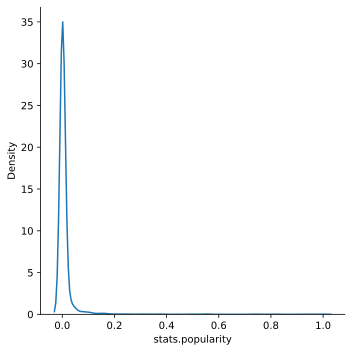

In [306]:
_ = sns.displot(data = df_search_details_da, x = 'stats.popularity', kind = 'kde')

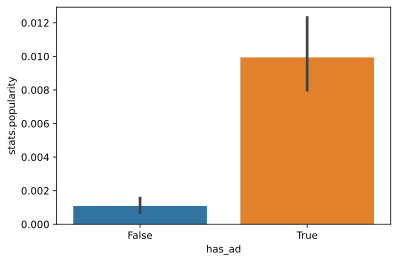

In [307]:
_ = sns.barplot(data = df_search_details_da, x = 'has_ad', y = 'stats.popularity')

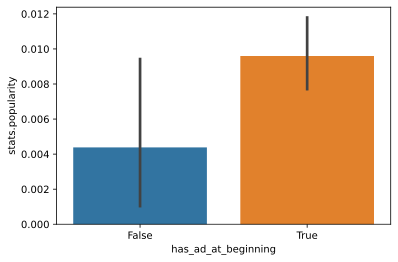

In [308]:
_ = sns.barplot(data = df_search_details_da, x = 'has_ad_at_beginning', y = 'stats.popularity')

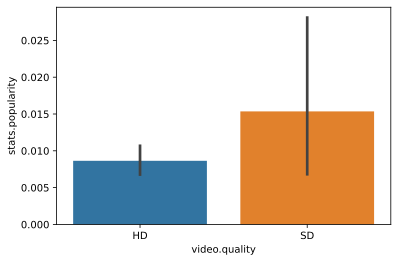

In [309]:
_ = sns.barplot(data = df_search_details_da, x = 'video.quality', y = 'stats.popularity')

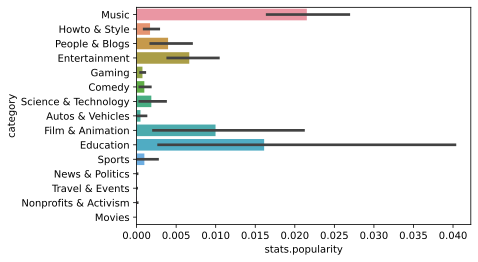

In [310]:
_ = sns.barplot(data = df_search_details_da, y = 'category', x = 'stats.popularity', orient = 'h')

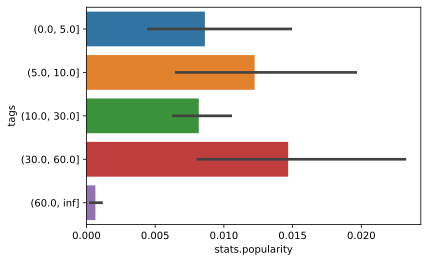

In [311]:
_ = sns.barplot(
    y = pd.cut(
        x = df_search_details_da['tags'].str.len(),
        bins = [np.PZERO, 5, 10, 30, 60, np.PINF]
    ), 
    x = df_search_details_da['stats.popularity'], 
    orient = 'h'
)

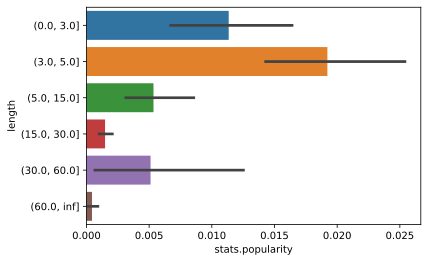

In [312]:
_ = sns.barplot(
    y = pd.cut(
        x = df_search_details_da['length'].apply(lambda x: x.seconds / 60),
        bins = [np.PZERO, 3, 5, 15, 30, 60, np.PINF]
    ), 
    x = df_search_details_da['stats.popularity'], 
    orient = 'h'
)

In [313]:
df_search_details_n = df_search_details.copy()

In [314]:
# We first reset the index of the dataframe
df_search_details_n= df_search_details_n.reset_index()

In [315]:
# We clean the unecessary information such as dislikes, creator time, creater stats view and creater stats posts
del df_search_details_n['id']
del df_search_details_n['creator.id']
del df_search_details_n['description']
del df_search_details_n['time']
del df_search_details_n['stats.dislike']
del df_search_details_n['video.quality']
del df_search_details_n['has_ad']

In [316]:
# we group the data by if there are ads in the begining and calculate the mean value of likes, comments and views
has_ad_likes = df_search_details_n.groupby(['has_ad_at_beginning'])['stats.like'].mean()
has_ad_comments = df_search_details_n.groupby(['has_ad_at_beginning'])['stats.comment'].mean()
has_ad_views = df_search_details_n.groupby(['has_ad_at_beginning'])['stats.view'].mean()

has_ad_likes = has_ad_likes.reset_index()
has_ad_comments= has_ad_comments.reset_index()
has_ad_views= has_ad_views.reset_index()

In [317]:
# we group the data based on video category and caluculte the mean value of likes, comments and views
category_likes = df_search_details_n.groupby(['category'])['stats.like'].mean()
category_comments = df_search_details_n.groupby(['category'])['stats.comment'].mean()
category_view = df_search_details_n.groupby(['category'])['stats.view'].mean()

category_likes= category_likes.reset_index()
category_comments= category_comments.reset_index()
category_view= category_view.reset_index()

In [318]:
# we group the data based on tags and calculate the mean value of likes, comments and views
# Replace rows with Nan with 0 tags, and count number of tags in each cell
num_tags = df_search_details_n['tags'].str.len()
num_tags = num_tags.fillna(0)

# For likes
tags_likes = pd.DataFrame({'Tags': num_tags, 'Likes': df_search_details_n['stats.like']})
tags_likes = tags_likes.groupby(['Tags']).mean()
tags_likes = tags_likes.reset_index()

# Divide by 1000 to make graph less cluttered
tags_likes['Likes'] = tags_likes['Likes'].div(1000)

# For comments
tags_comments = pd.DataFrame({'Tags': num_tags, 'Comments': df_search_details_n['stats.comment']})
tags_comments = tags_comments.groupby(['Tags']).mean()
tags_comments = tags_comments.reset_index()

# Divide by 1000 to make graph less cluttered
tags_comments['Comments'] = tags_comments['Comments'].div(1000)


# For views
tags_views = pd.DataFrame({'Tags': num_tags, 'Views': df_search_details_n['stats.view']})
tags_views = tags_views.groupby(['Tags']).mean()
tags_views = tags_views.reset_index()


# Divide by 100000 to make graph less cluttered
tags_views['Views'] = tags_views['Views'].div(100000)


In [319]:
# Video length conversion function to convert Timedelta observations to minutes for easier data analysis

def length_conv(length):
    return length.seconds / 60

In [320]:
# Apply length conversion function to dataset and rename column for clarity

df_searches = df_search_details.copy()

# Drop NA values in these 4 categories
df_searches.dropna(subset = ['length', 'stats.like', 'stats.comment', 'stats.view'], inplace = True)

# Drop videos with 0 comments since this means the owner disabled comments, and would interfere with the analysis for videos without disabled comments (which is most videos)
df_searches = df_searches[df_searches['stats.comment'] != 0]

# Apply length conversion function to dataset
df_searches['length'] = df_searches['length'].apply(length_conv)

# Rename length column for clarification
df_searches.rename(columns = {'length': 'length in mins'}, inplace = True)
df_report(df_searches)

---

# Results - 

## Data Preview

,title,description,time,length in mins,tags,category,creator.id,stats.like,stats.dislike,stats.comment,stats.view,video.quality,has_ad,has_ad_at_beginning
id,,,,,,,,,,,,,,
-1K_yQO8P_0,J / Feel Your Blaze,J LIVE and LET RIDE\n@SHIBUYA O-EAST 20081231\...,2017-02-09 15:12:20+00:00,5.766667,"[LUNA SEA, J LUNA SEA, Jun Onose, wumf, j feel...",Music,UCSJUUn_KQw1T3gff5mRjblg,291.0,3.0,24.0,48009.0,HD,True,True
-49fGh_Hbhw,My Pet Fish are DYING In My Backyard Pond! Res...,🔹Buy 𝙂𝙊𝙊𝙂𝘼𝙉 𝘽𝘼𝙄𝙏𝙎 -- https://googansquad.com/...,2021-03-09 00:19:41+00:00,24.950000,"[fishing, survial, camping, outdoors, cooking,...",Howto & Style,UCI6gB6eZS0c3ZrjcJq7xAtA,5187.0,93.0,648.0,132494.0,HD,True,True
-4z3GvwXCtM,YUMMY FOOD HACKS || Ultimate Snack Hacks You’l...,Whether you’re eating a snack after school or ...,2020-09-11 16:51:36+00:00,10.350000,"[DIY, hacks, tricks, craft, crafts, prank, pra...",People & Blogs,UCu_ytbeyzLZfIKWr43QSb5A,76075.0,10207.0,2687.0,10212445.0,HD,True,True
-6-FNvMf56A,Cardi B Meets Cardi E,"For Halloween, Ellen transformed into “Cardi E...",2019-10-31 13:00:00+00:00,6.050000,"[plm, ellen, ellen degeneres, the ellen degene...",Entertainment,UCp0hYYBW6IMayGgR-WeoCvQ,465187.0,19911.0,14175.0,23949467.0,HD,True,True
-6aXn_zyyiY,26 IDÉES SPLENDIDES À FAIRE QUAND ON S'ENNUIE,ACTIVITÉS GÉNIALES QUE TU DEVRAIS ESSAYER POUR...,2020-05-06 16:00:00+00:00,13.500000,"[fait-maison, art, savoir-faire, astuces, habi...",Howto & Style,UC9TJezP2M1ADmUYVl8hrQ2A,2800.0,248.0,199.0,202986.0,HD,True,True


## Stats

,length in mins,stats.like,stats.dislike,stats.comment,stats.view
count,1887.000000,1.887000e+03,1.887000e+03,1.887000e+03,1.887000e+03
mean,14.862471,3.304262e+05,2.739401e+04,1.961607e+04,4.674245e+07
std,37.271028,1.253443e+06,1.756421e+05,1.375464e+05,2.404722e+08
min,0.050000,9.000000e+00,0.000000e+00,1.000000e+00,1.840000e+02
25%,3.600000,3.793000e+03,8.500000e+01,2.140000e+02,1.074490e+05
50%,6.916667,2.317200e+04,6.850000e+02,1.328000e+03,1.042003e+06
75%,14.466667,1.215075e+05,5.369500e+03,6.041500e+03,9.720598e+06
max,913.400000,2.111358e+07,4.142776e+06,5.198500e+06,4.418250e+09


---

Text(0, 0.5, 'Average likes')

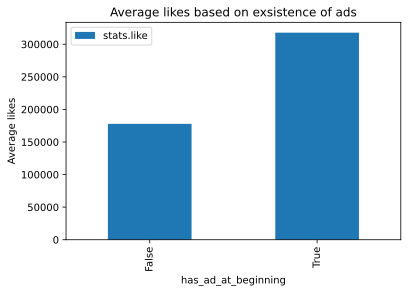

Text(0, 0.5, 'Average comments')

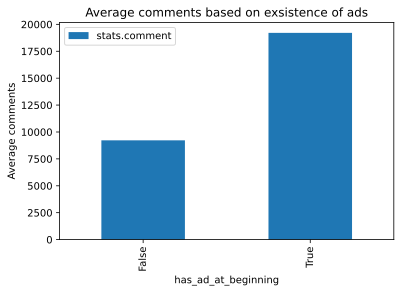

Text(0, 0.5, 'Average views')

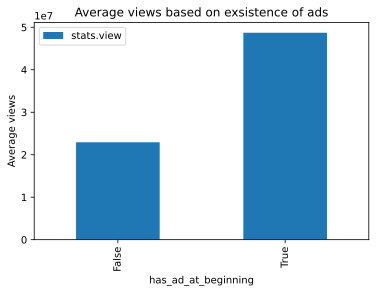

In [321]:
# We plot the average popularity (likes, comments, views) compared to the existence of ads
ax_likes = has_ad_likes.plot.bar(x= 'has_ad_at_beginning', y= 'stats.like', title= "Average likes based on exsistence of ads")
ax_likes.set_ylabel("Average likes")
plt.show()
ax_comments= has_ad_comments.plot.bar(x= 'has_ad_at_beginning', y= 'stats.comment',  title= "Average comments based on exsistence of ads")
ax_comments.set_ylabel("Average comments")
plt.show()
ax_views= has_ad_views.plot.bar(x= 'has_ad_at_beginning', y= 'stats.view', title= "Average views based on exsistence of ads")
ax_views.set_ylabel("Average views")
plt.show()

The plots above compare the vidoes that had an ad at the begining of the vidoe and videos that do not have ads at the begining of a video. The first plot compares has_ad_at_begining to the average likes. The second plot compares has_ad_at_begining to average comments and the final lot compares has_ad_at_begining to average views. We can see that in all three cases, the popularity of the videos is higher when there is an ad attached to the video. 

Text(0, 0.5, 'Average likes')

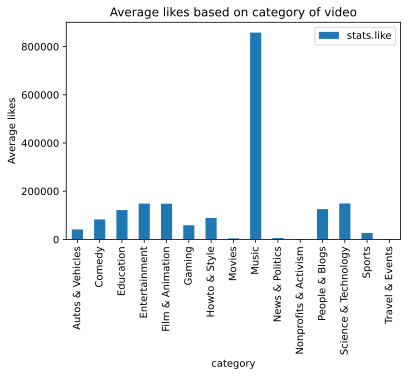

Text(0, 0.5, 'Average comments')

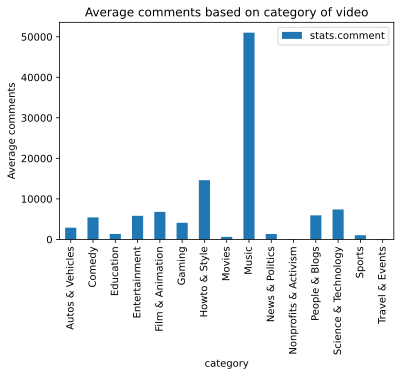

Text(0, 0.5, 'Average views')

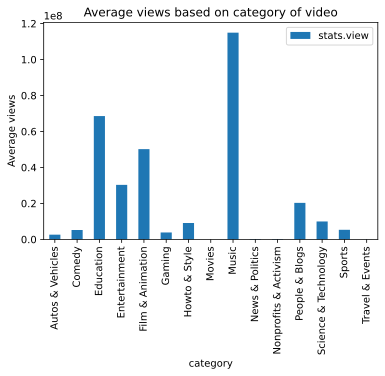

In [322]:
# We plot the average popularity (likes, comments, views) compared to the category of the videos
ax_category_likes = category_likes.plot.bar(x= 'category', y= 'stats.like', title= "Average likes based on category of video")
ax_category_likes.set_ylabel("Average likes")
plt.show()
ax_category_comments = category_comments.plot.bar(x= 'category', y= 'stats.comment', title= "Average comments based on category of video")
ax_category_comments.set_ylabel("Average comments")
plt.show()
ax_category_views = category_view.plot.bar(x= 'category', y= 'stats.view', title= "Average views based on category of video")
ax_category_views.set_ylabel("Average views")
plt.show()

The plots above compare the the category of the videos and to the popularity of videos The first plot compares category to the average likes. The second plot compares category to average comments and the final lot compares category to average views. We can see that in all three cases, that the music category has high popularity is comparison to the other categories. We also notice that within popularity, views are high in the pets and animals category.

<AxesSubplot:xlabel='bin', ylabel='Likes'>

Text(0.5, 1.0, 'Likes vs Tags')

Text(0.5, 0, 'Number of Tags (Count)')

Text(0, 0.5, 'Number of Likes (Thousands)')

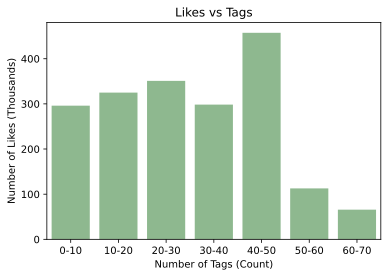

In [323]:
# Compare the number of likes to number of tags

# Fixes the issue where 0 tages was not being binned into first bin
tags_likes.at[0,'Tags'] = 1
tags_likes['bin'] = pd.cut(tags_likes['Tags'], bins=range(0,71,10), labels=[f'{l}-{l+10}' for l in range(0,61,10)])

sns.barplot(x='bin', y='Likes', color="#87bf89", data=tags_likes, ci=None)
plt.title("Likes vs Tags")
plt.xlabel("Number of Tags (Count)")
plt.ylabel("Number of Likes (Thousands)")

[Text(0.5, 0, 'Number of Tags'), Text(0, 0.5, 'Number of Likes')]

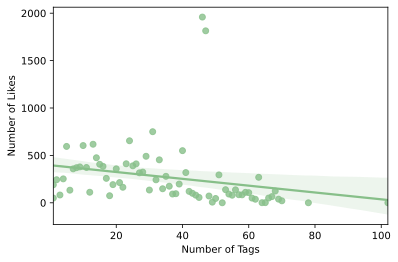

In [324]:
ax3 = sns.regplot(x="Tags", y= "Likes", color= "#87bf89", data=tags_likes)
ax3.set(xlabel='Number of Tags', ylabel='Number of Likes')

<AxesSubplot:xlabel='bin', ylabel='Comments'>

Text(0.5, 1.0, 'Comments vs Tags')

Text(0.5, 0, 'Number of Tags (Count)')

Text(0, 0.5, 'Number of Comments (Thousands)')

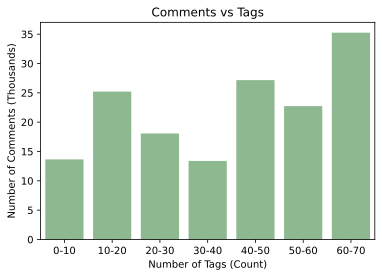

In [325]:
# Compare the number of comments to number of tags

#Fixes the issue where 0 tages was not being binned into first bin
tags_comments.at[0,'Tags'] = 1
tags_comments['bin'] = pd.cut(tags_likes['Tags'], bins=range(0,71,10), labels=[f'{l}-{l+10}' for l in range(0,61,10)])

sns.barplot(x='bin', y='Comments', color="#87bf89", data=tags_comments, ci=None)
plt.title("Comments vs Tags")
plt.xlabel("Number of Tags (Count)")
plt.ylabel("Number of Comments (Thousands)")

<AxesSubplot:xlabel='bin', ylabel='Views'>

Text(0.5, 1.0, 'Views vs Tags')

Text(0.5, 0, 'Number of Tags (Count)')

Text(0, 0.5, 'Number of Views (Hundred Thousands)')

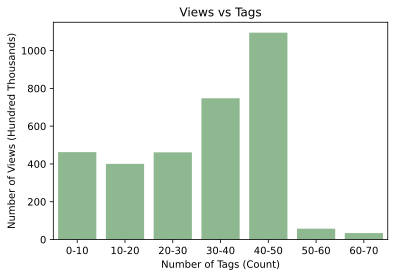

In [326]:
# Compare the number of views to number of tags

#Fixes the issue where 0 tags was not being binned into first bin
tags_views.at[0,'Tags'] = 1
tags_views['bin'] = pd.cut(tags_likes['Tags'], bins=range(0,71,10), labels=[f'{l}-{l+10}' for l in range(0,61,10)])

sns.barplot(x='bin', y='Views', color="#87bf89", data=tags_views, ci=None)
plt.title("Views vs Tags")
plt.xlabel("Number of Tags (Count)")
plt.ylabel("Number of Views (Hundred Thousands)")

In [327]:
# -The above three plots compare the number of tags to likes, comments, and views. When observing all three graphs, 40-50 tags consistently seem to perform relatively well in each metric. This is apparent in Likes vs Tags and Views vs Tags distribution, but less so in Comments vs Tags plot due to it being a bimodal distribution. 

### Video Length Analysis


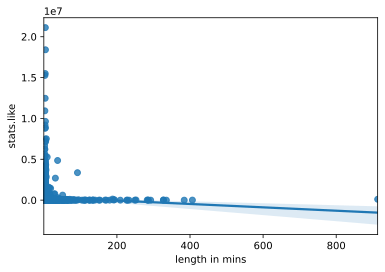

In [328]:
# We compare the length of all videos to their number of likes (scatterplot/regression line)

length_views_reg = sns.regplot(x = 'length in mins', y = 'stats.like', data = df_searches)
#length_views_reg.set(xlim = (0, 400), ylim = (0, 100000000)) # commenting this out zooms out and shows all the data points


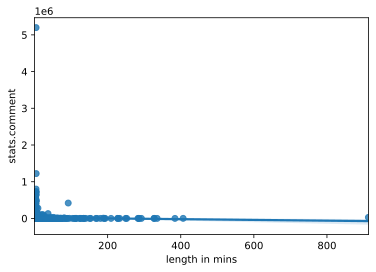

In [329]:
# We compare the length of all videos to their number of comments (scatterplot/regression line)

length_views_reg = sns.regplot(x = 'length in mins', y = 'stats.comment', data = df_searches)

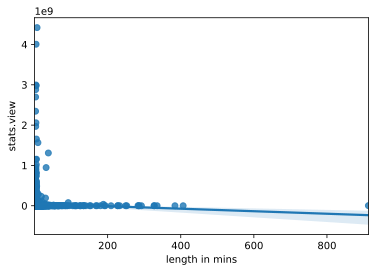

In [330]:
# We compare the length of all videos to their number of views (scatterplot/regression line)

length_views_reg = sns.regplot(x = 'length in mins', y = 'stats.view', data = df_searches)

### We see from these 3 scatterplots that the majority of videos here have a length between 0-200 minutes. We will thus separate the videos into 5 sections based on arbitrarily chosen limits for the length and analyze these smaller sections

In [331]:
# "shortest"
df_searches_shortest_length = df_searches[df_searches['length in mins'] <= 3]

# "short"
df_searches_short_length = df_searches[(df_searches['length in mins'] > 3) & (df_searches['length in mins'] <= 5)]

# "medium"
df_searches_medium_length = df_searches[(df_searches['length in mins'] > 5) & (df_searches['length in mins'] <= 15)]

# "long"
df_searches_long_length = df_searches[(df_searches['length in mins'] > 15) & (df_searches['length in mins'] <= 30)]

# "longer"
df_searches_longer_length = df_searches[(df_searches['length in mins'] > 30) & (df_searches['length in mins'] <= 60)]

# "longest"
df_searches_longest_length = df_searches[(df_searches['length in mins'] > 60) & (df_searches['length in mins'] <= 200)]


print('Proportion of datatset for 0-3 minute videos:    ' + str(round(df_searches_shortest_length.shape[0]/df_searches.shape[0], 3)))
print('Proportion of datatset for 3-5 minute videos:    ' + str(round(df_searches_short_length.shape[0]/df_searches.shape[0], 3)))
print('Proportion of datatset for 5-15 minute videos:   ' + str(round(df_searches_medium_length.shape[0]/df_searches.shape[0], 3)))
print('Proportion of datatset for 15-30 minute videos:  ' + str(round(df_searches_long_length.shape[0]/df_searches.shape[0], 3)))
print('Proportion of datatset for 30-60 minute videos:  ' + str(round(df_searches_longer_length.shape[0]/df_searches.shape[0], 3)))
print('Proportion of datatset for 60-200 minute videos: ' + str(round(df_searches_longest_length.shape[0]/df_searches.shape[0], 3)))


Proportion of datatset for 0-3 minute videos:    0.143
Proportion of datatset for 3-5 minute videos:    0.286
Proportion of datatset for 5-15 minute videos:   0.337
Proportion of datatset for 15-30 minute videos:  0.161
Proportion of datatset for 30-60 minute videos:  0.04
Proportion of datatset for 60-200 minute videos: 0.025


#### Just from looking at the proportion of videos by length, it appears that more than half of the videos that are uploaded are in the 3-15 minute range, suggesting that more people upload this length of videos because they tend to be more popular

## Length vs Likes

[(0.0, 1000000.0)]

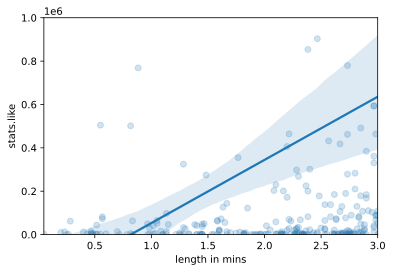

In [332]:
# We compare the length of "shortest" length videos to their number of likes (scatterplot/regression line)
likes_shortest = sns.regplot(x = 'length in mins', y = 'stats.like', data = df_searches_shortest_length, scatter_kws={'alpha':0.2})

# commenting out this line zooms out to show all data points in the scatterplot
likes_shortest.set(ylim = (0,1000000))

# Descriptive stats
#print(df_searches_shortest_length['stats.like'].describe())


[(0.0, 2500000.0)]

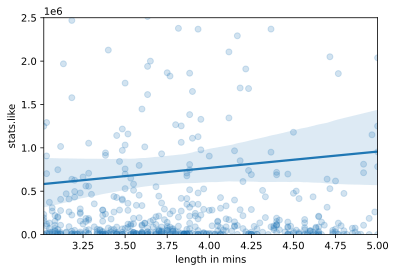

In [333]:
# We compare the length of "short" length videos to their number of likes (scatterplot/regression line)
likes_short = sns.regplot(x = 'length in mins', y = 'stats.like', data = df_searches_short_length, scatter_kws={'alpha':0.2})

# commenting out this line zooms out to show all data points in the scatterplot
likes_short.set(ylim = (0,2500000)) 


# Descriptive stats
#print(df_searches_short_length['stats.like'].describe())


[(0.0, 500000.0)]

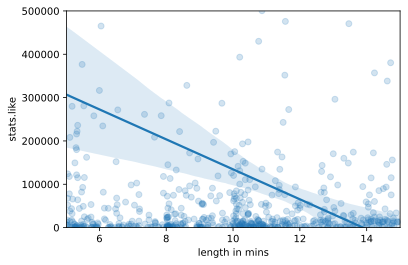

In [334]:
# We compare the length of "medium" length videos to their number of likes (scatterplot/regression line)
likes_medium = sns.regplot(x = 'length in mins', y = 'stats.like', data = df_searches_medium_length, scatter_kws={'alpha':0.2})

# commenting out this line zooms out to show all data points in the scatterplot
likes_medium.set(ylim = (0,500000)) 

# Descriptive stats
#print(df_searches_medium_length['stats.like'].describe())


#### This category of "medium" length videos is when the regression line slope for likes switches to negative

[(0.0, 200000.0)]

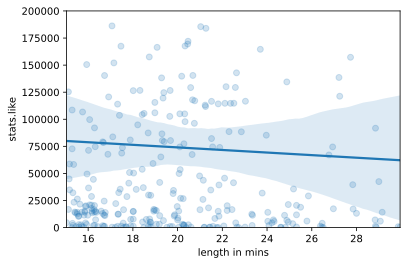

In [335]:
# We compare the length of "long" length videos to their number of likes
likes_long = sns.regplot(x = 'length in mins', y = 'stats.like', data = df_searches_long_length, scatter_kws={'alpha':0.2})

# commenting out this line zooms out to show all data points in the scatterplot
likes_long.set(ylim = (0,200000)) 

# Descriptive stats
#print(df_searches_long_length['stats.like'].describe())


[(0.0, 250000.0)]

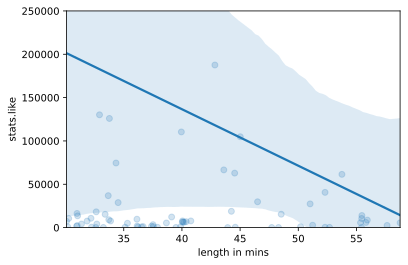

In [336]:
# We compare the length of "longer" length videos to their number of likes
likes_longer = sns.regplot(x = 'length in mins', y = 'stats.like', data = df_searches_longer_length, scatter_kws={'alpha':0.2})

# commenting out this line zooms out to show all data points in the scatterplot
likes_longer.set(ylim = (0,250000))

# Descriptive stats
#print(df_searches_longer_length['stats.like'].describe())


[(0.0, 250000.0)]

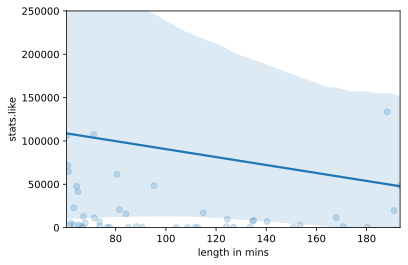

In [337]:
# We compare the length of "longest" length videos to their number of likes
likes_longest = sns.regplot(x = 'length in mins', y = 'stats.like', data = df_searches_longest_length, scatter_kws={'alpha':0.2})

# commenting out this line zooms out to show all data points in the scatterplot
likes_longest.set(ylim = (0,250000))

# Descriptive stats
#print(df_searches_longest_length['stats.like'].describe())


In [338]:
# Array of medians in ascending order of video length
median_likes = [df_searches_shortest_length['stats.like'].median(),
                df_searches_short_length['stats.like'].median(), 
                df_searches_medium_length['stats.like'].median(), 
                df_searches_long_length['stats.like'].median(), 
                df_searches_longer_length['stats.like'].median(),
                df_searches_longest_length['stats.like'].median()]

# Array of means in ascending order of video length
mean_likes = [round(df_searches_shortest_length['stats.like'].mean(), 1),
              round(df_searches_short_length['stats.like'].mean(), 1), 
              round(df_searches_medium_length['stats.like'].mean(), 1), 
              round(df_searches_long_length['stats.like'].mean(), 1), 
              round(df_searches_longer_length['stats.like'].mean(), 1),
              round(df_searches_longest_length['stats.like'].mean(), 1)]

print(median_likes)
print(mean_likes)


[19552.0, 98063.5, 15345.0, 20511.0, 6806.0, 6117.0]
[359704.8, 738696.0, 142733.9, 74191.0, 131788.9, 89570.4]


### We can see that videos of length 3-5 minutes have a much higher median and mean of likes than other videos

## Length vs Comments

[(0.0, 100000.0)]

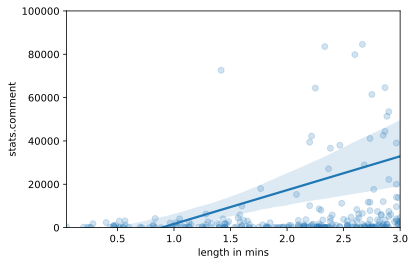

In [339]:
# We compare the length of "shortest" length videos to their number of comments (scatterplot/regression line)
comments_shortest = sns.regplot(x = 'length in mins', y = 'stats.comment', data = df_searches_shortest_length, scatter_kws={'alpha':0.2})

# commenting out this line zooms out to show all data points in the scatterplot
comments_shortest.set(ylim = (0,100000))

# Descriptive stats
#print(df_searches_shortest_length['stats.comment'].describe())


[(0.0, 100000.0)]

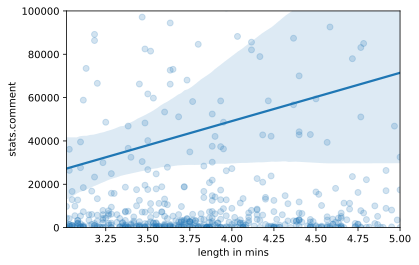

In [340]:
# We compare the length of "short" length videos to their number of comments (scatterplot/regression line)
comments_short = sns.regplot(x = 'length in mins', y = 'stats.comment', data = df_searches_short_length, scatter_kws={'alpha':0.2})

# commenting out this line zooms out to show all data points in the scatterplot
comments_short.set(ylim = (0,100000))

# Descriptive stats
#print(df_searches_short_length['stats.comment'].describe())


[(0.0, 15000.0)]

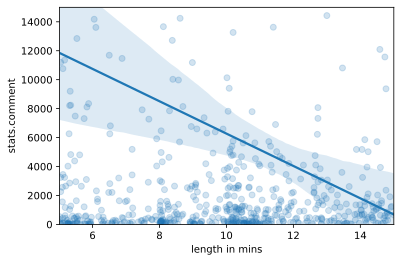

In [341]:
# We compare the length of "medium" length videos to their number of comments (scatterplot/regression line)
comments_medium = sns.regplot(x = 'length in mins', y = 'stats.comment', data = df_searches_medium_length, scatter_kws={'alpha':0.2})

# commenting out this line zooms out to show all data points in the scatterplot
comments_medium.set(ylim = (0,15000))
# Descriptive stats
#print(df_searches_medium_length['stats.comment'].describe())


#### This category of "medium" length videos is when the regression line slope for comments switches to negative

[(0.0, 15000.0)]

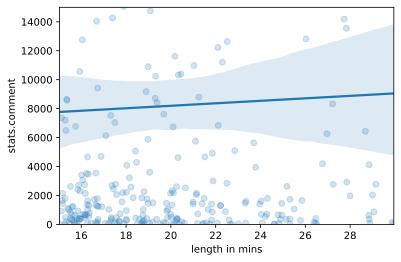

In [342]:
# We compare the length of "long" length videos to their number of comments (scatterplot/regression line)
comments_long = sns.regplot(x = 'length in mins', y = 'stats.comment', data = df_searches_long_length, scatter_kws={'alpha':0.2})

# commenting out this line zooms out to show all data points in the scatterplot
comments_long.set(ylim = (0,15000))

# Descriptive stats
#print(df_searches_long_length['stats.comment'].describe())


#### The slope for the regression line switches back to positive for "long" videos

[(0.0, 20000.0)]

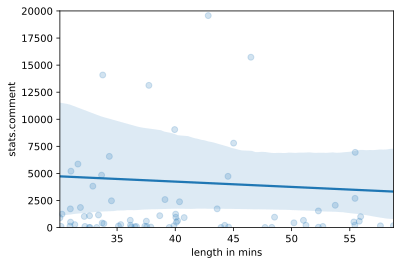

In [343]:
# We compare the length of "longer" length videos to their number of comments (scatterplot/regression line)
comments_longer = sns.regplot(x = 'length in mins', y = 'stats.comment', data = df_searches_longer_length, scatter_kws={'alpha':0.2})

# commenting out this line zooms out to show all data points in the scatterplot
comments_longer.set(ylim = (0,20000))

# Descriptive stats
#print(df_searches_longer_length['stats.comment'].describe())


#### The slope for the regression line switches back to negative for "longer" videos

[(0.0, 15000.0)]

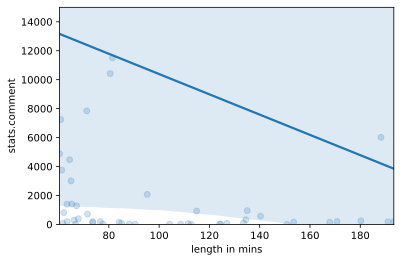

In [344]:
# We compare the length of "longest" length videos to their number of comments (scatterplot/regression line)
comments_longest = sns.regplot(x = 'length in mins', y = 'stats.comment', data = df_searches_longest_length, scatter_kws={'alpha':0.2})

# commenting out this line zooms out to show all data points in the scatterplot
comments_longest.set(ylim = (0,15000))

# Descriptive stats
#print(df_searches_longest_length['stats.comment'].describe())


In [345]:
# Array of medians in ascending order of video length
median_comment = [df_searches_shortest_length['stats.comment'].median(),
                df_searches_short_length['stats.comment'].median(), 
                df_searches_medium_length['stats.comment'].median(), 
                df_searches_long_length['stats.comment'].median(), 
                df_searches_longer_length['stats.comment'].median(),
                df_searches_longest_length['stats.comment'].median()]

# Array of means in ascending order of video length
mean_comment = [round(df_searches_shortest_length['stats.comment'].mean(), 1),
              round(df_searches_short_length['stats.comment'].mean(), 1), 
              round(df_searches_medium_length['stats.comment'].mean(), 1), 
              round(df_searches_long_length['stats.comment'].mean(), 1), 
              round(df_searches_longer_length['stats.comment'].mean(), 1),
              round(df_searches_longest_length['stats.comment'].mean(), 1)]

print(median_likes)
print(mean_likes)


[19552.0, 98063.5, 15345.0, 20511.0, 6806.0, 6117.0]
[359704.8, 738696.0, 142733.9, 74191.0, 131788.9, 89570.4]


### We can see that videos of length 3-5 minutes have a much higher median and mean of comments than other videos

## Length vs Views

[(0.0, 500000000.0)]

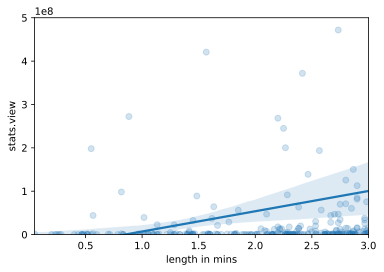

In [346]:
# We compare the length of "shortest" length videos to their number of views (scatterplot/regression line)
views_shortest = sns.regplot(x = 'length in mins', y = 'stats.view', data = df_searches_shortest_length, scatter_kws={'alpha':0.2})

# commenting out this line zooms out to show all data points in the scatterplot
views_shortest.set(ylim = (0,500000000))

# Descriptive stats
#print(df_searches_shortest_length['stats.view'].describe())


#### The slope for the regression line is positive

[(0.0, 500000000.0)]

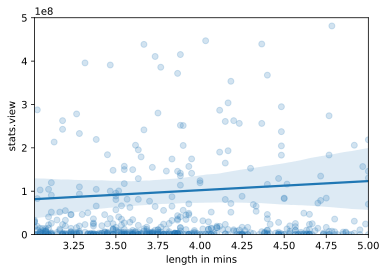

In [347]:
# We compare the length of "short" length videos to their number of views (scatterplot/regression line)
views_short = sns.regplot(x = 'length in mins', y = 'stats.view', data = df_searches_short_length, scatter_kws={'alpha':0.2})

# commenting out this line zooms out to show all data points in the scatterplot
views_short.set(ylim = (0,500000000))

# Descriptive stats
#print(df_searches_short_length['stats.view'].describe())


[(0.0, 100000000.0)]

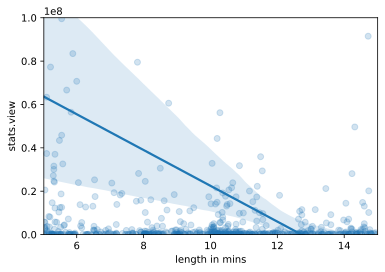

In [348]:
# We compare the length of "medium" length videos to their number of views (scatterplot/regression line)
views_medium = sns.regplot(x = 'length in mins', y = 'stats.view', data = df_searches_medium_length, scatter_kws={'alpha':0.2})

# commenting out this line zooms out to show all data points in the scatterplot
views_medium.set(ylim = (0,100000000))

# Descriptive stats
#print(df_searches_medium_length['stats.view'].describe())


[(0.0, 20000000.0)]

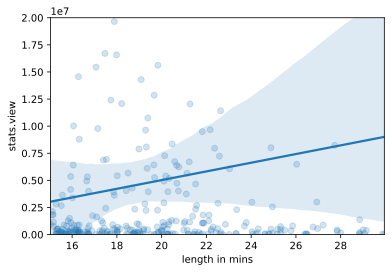

In [349]:
# We compare the length of "long" length videos to their number of views (scatterplot/regression line)
views_long = sns.regplot(x = 'length in mins', y = 'stats.view', data = df_searches_long_length, scatter_kws={'alpha':0.2})

# commenting out this line zooms out to show all data points in the scatterplot
views_long.set(ylim = (0,20000000))

# Descriptive stats
#print(df_searches_long_length['stats.view'].describe())


[(0.0, 100000000.0)]

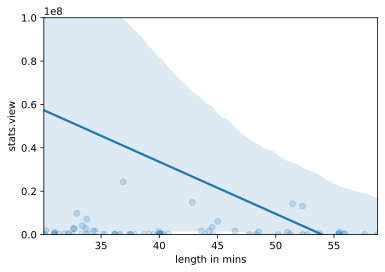

In [350]:
# We compare the length of "longer" length videos to their number of views (scatterplot/regression line)
views_longer = sns.regplot(x = 'length in mins', y = 'stats.view', data = df_searches_longer_length, scatter_kws={'alpha':0.2})

# commenting out this line zooms out to show all data points
views_longer.set(ylim = (0,100000000)) 

# Descriptive stats
#print(df_searches_longer_length['stats.view'].describe())


[(0.0, 10000000.0)]

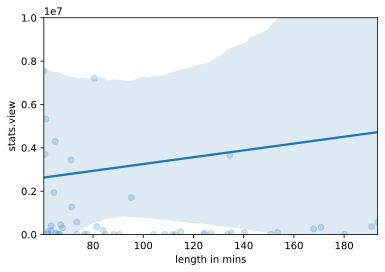

In [351]:
# We compare the length of "longest" length videos to their number of views (scatterplot/regression line)
views_longest = sns.regplot(x = 'length in mins', y = 'stats.view', data = df_searches_longest_length, scatter_kws={'alpha':0.2})

# commenting out this line zooms out to show all data points
views_longest.set(ylim = (0,10000000)) 

# Descriptive stats
#print(df_searches_longest_length['stats.view'].describe())


#### The slope starts off as positive for "shortest" videos, then switches to negative for "medium" videos, then back to positive for "long",  back to negative for "longer", and positive for "longest"

In [352]:
# Array of medians in ascending order of video length
median_views = [df_searches_shortest_length['stats.view'].median(),
                df_searches_short_length['stats.view'].median(), 
                df_searches_medium_length['stats.view'].median(), 
                df_searches_long_length['stats.view'].median(), 
                df_searches_longer_length['stats.view'].median(),
                df_searches_longest_length['stats.view'].median()]

# Array of means in ascending order of video length
mean_views = [round(df_searches_shortest_length['stats.view'].mean(), 1),
              round(df_searches_short_length['stats.view'].mean(), 1), 
              round(df_searches_medium_length['stats.view'].mean(), 1), 
              round(df_searches_long_length['stats.view'].mean(), 1), 
              round(df_searches_longer_length['stats.view'].mean(), 1),
              round(df_searches_longest_length['stats.view'].mean(), 1)]

#print(median_views)
#print(mean_views)

# Change units so it isn't in thousands
tags_views['Views'] = tags_views['Views'] * 100000
tags_likes['Likes'] = tags_likes['Likes'] * 1000
tags_comments['Comments'] = tags_comments['Comments'] * 1000


# Get the respective data for tags
tags_views_mean = tags_views.groupby(['bin']).mean().reset_index()
tags_likes_mean = tags_likes.groupby(['bin']).mean().reset_index()
tags_comments_mean = tags_comments.groupby(['bin']).mean().reset_index()

# Array of list of tags by bin
tags = tags_views.groupby(['bin']).mean()
tags = tags.reset_index()
tags = tags['bin']

In [353]:
column_names = ["video characteristic", "average likes", "average comments", "average views", "average popularity"]

#initialize dataframes
df = pd.DataFrame(columns = column_names)
df_2 = pd.DataFrame(columns = column_names)
df_3 = pd.DataFrame(columns = column_names)
df_4 = pd.DataFrame(columns = column_names)

ads = ["Has ads at the begining of video", "No ads at the begining of video"]
length = ["Shortest length", "Short length", "Meduim length", "Long length", "Longer length", "Longest length"]
tags = ["0-10 tags","10-20 tags","20-30 tags","40-50 tags","50-60 tags","60-70 tags"]

#dataframe with ads values
df["video characteristic"], df["average likes"],  df["average comments"], df["average views"] = [ads,
                                                                                                df["average likes"].append(has_ad_likes['stats.like'], ignore_index= True), 
                                                                                                df["average comments"].append(has_ad_comments['stats.comment'], ignore_index= True),
                                                                                                df["average views"].append(has_ad_views['stats.view'], ignore_index= True)]
#dataframe with caterofy values
df_2["video characteristic"], df_2["average likes"],  df_2["average comments"], df_2["average views"]= [df_2["video characteristic"].append(category_likes['category'], ignore_index= True),
                                                                                                df_2["average likes"].append(category_likes['stats.like'], ignore_index= True), 
                                                                                                df_2["average comments"].append(category_comments['stats.comment'], ignore_index= True),
                                                                                                df_2["average views"].append(category_view['stats.view'], ignore_index= True)]

df_3["video characteristic"],df_3["average likes"],  df_3["average comments"], df_3["average views"]= [length, mean_likes, mean_comment, mean_views]

df_4["video characteristic"],df_4["average likes"],  df_4["average comments"], df_4["average views"] = [ tags, tags_likes_mean['Likes'], tags_comments_mean['Comments'], tags_views_mean['Views']]

#append dataframes together 
df = df.append(df_2)
df= df.append(df_3)
df = df.append(df_4)

df['average popularity'] = (df['average likes']+ df['average comments']+ df['average views'])/3

#Standardize Popularity 
df['average popularity'] = df['average popularity'] / df['average popularity'].max()
df

,video characteristic,average likes,average comments,average views,average popularity
0,Has ads at the begining of video,177777.146552,9221.770270,2.293400e+07,0.199640
1,No ads at the begining of video,317759.891461,19210.498078,4.871490e+07,0.423542
0,Autos & Vehicles,41288.058824,2894.305556,2.620629e+06,0.023010
1,Comedy,82558.450820,5428.294118,5.217523e+06,0.045811
2,Education,121621.711340,1339.638554,6.853934e+07,0.592870
3,Entertainment,148440.636872,5819.372506,3.030296e+07,0.262985
4,Film & Animation,148098.423529,6797.883117,5.017027e+07,0.434537
5,Gaming,58495.388514,4086.939189,3.818900e+06,0.033515
6,Howto & Style,89134.948454,14608.260417,9.100643e+06,0.079476
7,Movies,4019.000000,614.000000,NaN,NaN


Text(0.5, 0, 'Popularity(Scaled to 1.0)')

Text(0, 0.5, 'Video Characteristics')

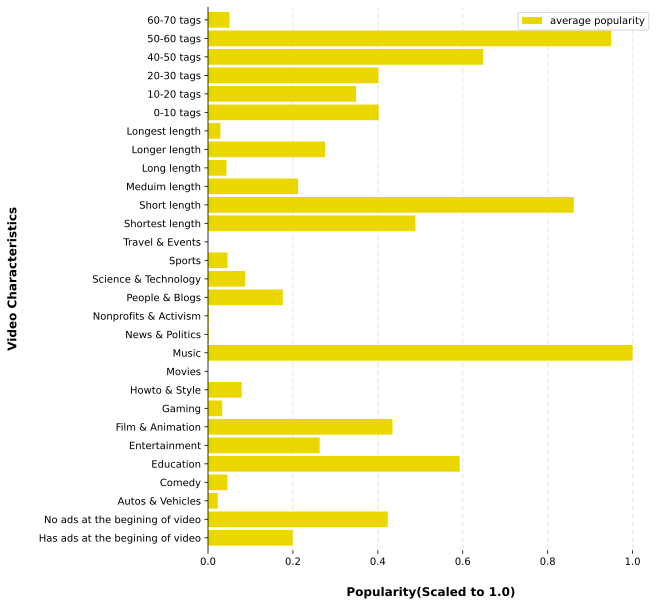

In [354]:
#Horizontal bar chart of video characteristics 
ax4 = df.plot.barh(x='video characteristic', y='average popularity', figsize=(8, 10), color='#EAD700', zorder=2, width=0.85)

# Remove the spines
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_visible(False)

# x-axis label
ax4.set_xlabel("Popularity(Scaled to 1.0)", labelpad=20, weight='bold', size=12)

# y-axis label
ax4.set_ylabel("Video Characteristics", labelpad=20, weight='bold', size=12)

# Vertical dashed lines
axis = ax4.get_xticks()
for mark in axis:
    if mark != axis[6]:
        noPrintConsole = ax4.axvline(x=mark, linestyle='dashed', alpha=1.0, color='#eeeeee', zorder=1)


### End result of our analysis

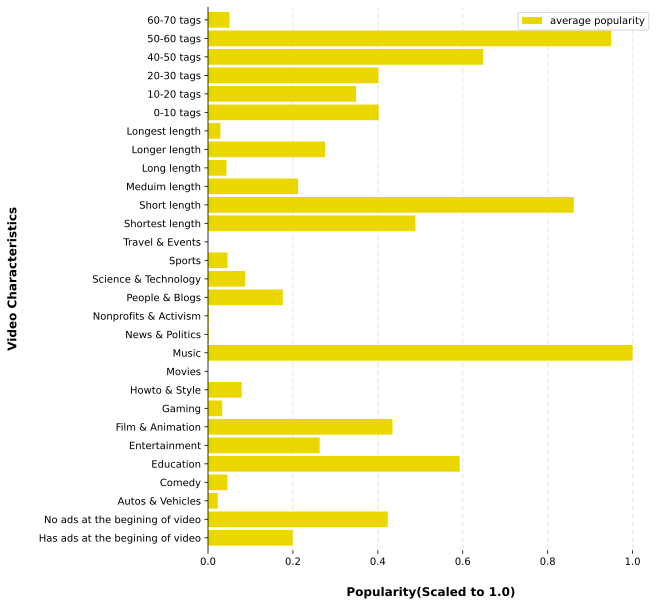

In [355]:
ax4.figure

### We can see that videos of length 3-5 minutes have a much higher median and mean of views than other videos

# Ethics & Privacy

This research conforms to the privacy policies of data providing social media platforms. Because our research question is about social media platforms like YouTube, it encompasses many different people; while we can estimate a common age range for social media users even those without a social media account can still view these videos and still contribute to the stats behind those videos (no matter the media platform). These stats are also used to make algorithmic recommendations to everyone who accesses the platform (YouTube), therefore we believe our project scope would include some general internet users in addition to those who actually have accounts and are active on YouTube. Our data comes from the YouTube API, which includes the account username for the content creator, but does not include any other personal identifying information about those who had interactions with a given video. Therefore, we believe that privacy concerns would be minimal with this dataset. Some concerns we have mainly concern the transparency of the youtube algorithm for its charts or recommendations. We are limited to our definition of “popularity” (likes/comments/views) because we do not have access to YouTube’s exact algorithm. One interesting thing to note is that YouTube's "most popular" ranking is not in direct correlation with view counts. As a matter of fact, none of the "viral" videos (e.g. dQw4w9WgXcQ, "yee", Despacito) that we know of are in the dataset provided by YouTube. This again poses challenges to our data collection process, because we are not entirely sure what criteria needs to be met for a video to be on the “chart”. To avoid potential bias in our limited data and subsequent analysis/discussions about the results, we would have to investigate and expand our research in order to incorporate our data with the algorithm information in order to conduct a deeper analysis. Finally because the data we are looking at (likes, dislikes, shares, views, etc.) is readily available from the API, we believe it would not be a problem to continuously update information as time goes on and new data becomes available.        


# Conclusion & Discussion

**Based on our analysis, our hypothesis was correct in that some attributes that affect the popularity of a video in the United States include duration, category, ads, and tags. More popular videos tend to be 5 minutes or less, adless in the beginning, have about 40-60 tags, and are categorized as “music”.** 
However, this is not exclusive to other attributes as our analysis was limited to attributes that we were able to identify and had access to through the YouTube API. These results are limited in that we cannot say how much these attributes affect popularity, we can only conclude the common attributes of popular videos (again based on our definition of popular). To further/improve our study we would want to expand on the parameters of popularity and ads (include no ads, ads throughout the video, etc.), and examine more attributes (with more data of course). 

From our discussions we believe that these results are telling in that they gave us an idea of what conditions make a video more likely to be popular and thus widespread among people, making the content of videos that meet these conditions more influential (good or bad). A point of surprise that continually came up was the presence of ads. While our results suggest that YouTube does not optimize popularity for ads, we know that the popularity of videos are influenced by YouTube and the algorithm, which we cannot draw any conclusions about the role of the algorithm without information about it (also affected again by the limited parameters of ads). It is important to know what kinds of content are most influential, as well as who has control over decisions involving this content as it is fed to millions of people. 

# Team Contributions

*Specify who in your group worked on which parts of the project.*